In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as ct

In [2]:
δ = 1e-6 # m
D = 2.299E-8 # m2·s−1 # Diffusion Coefficient
τ = δ/D # s
T = 298.15 # K
Z = 1 * ct.elementary_charge
α = δ / ( τ * D)
β = Z / ( ct.Boltzmann * T)
print('τ:', τ, 's')
print('α:', α)
print('β:', β)

τ: 43.49717268377555 s
α: 1.0
β: 38.92174449622701


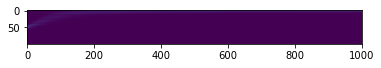

In [3]:
x = np.arange(0, 100*δ, δ)
t = np.arange(0, 1000*τ, τ)
tt, xx = np.meshgrid(t, x)
C = np.zeros(xx.shape)
φ = 0 * np.ones(len(x))
C[int(len(x)/2), 0] = 1
for m in range(len(t)-1):
    for n in range(len(x)-2):
        Δφ1 = φ[n+1] - φ[n]
        Δφ2 = φ[n+2] - 2*φ[n+1] + φ[n]
        C[n, m+1] = C[n+2, m] + (β*Δφ1 - 2)*C[n+1, m] + (1 + α + β*Δφ1 + β*Δφ2)*C[n, m]
        C[n, m+1] /= α
        C[n, m+1] = np.abs(C[n, m+1])
    C[:, m+1] = sum(C[:, m]) * C[:, m+1] / sum(C[:, m+1])
plt.imshow(C)

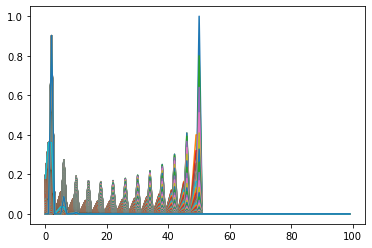

In [6]:
plt.figure()
for m in range(0, len(t), 1):
    plt.plot(C[:, m])
plt.show()